# Modeling

## Introduction

### Data Science Problem

- Can we construct a model predicting the sale price of an Ames, IA home based on certain numeric and categorical features? 
- Given a predictive model, can we tune its parameters to give the best result?

### Methodology

In this notebook, we're build a regression model using Ames' housing sale price data set that we cleaned in the notebook titled `eda_and_data_cleaning` -- this is the `ames_cleaned.csv`.

We fit and score our models. The regression models that will be used in this notebook are:
- Linear Regression
- k-Nearest Neigbors
- Ridge ($L^2$-norm)
- LASSO ($L^1$-norm)

To evaluate the effectiveness of each model, we will the following metrics (using `sklearn`'s built-in metrics)

### Key Results

The most accurate model is the `KNeighborsRegressor`, but it suffers is less interpretable than one of the other linear regression models, particularly LASSO. LASSO tells you which features are important, and which can be eliminated from the model (these have `coefficient = 0`).

### Recommendations

This model will likely generalize to other Midestern U.S. cities with sales taking place in a comparable time period and city size since most of the features used in this model is information filed with the paperwork used to obtain building permits. Collecting aggregate climate and economic data for the neighborhood the house is located may help the model generalize beyond Ames.

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%pwd

'C:\\Users\\gabri\\Dropbox\\General Assembly\\git_homeworks\\DSI-9-submissions\\gabrieljdusing\\project_2_submission'

In [3]:
data_path = './datasets/ames_cleaned.csv'

In [4]:
ames = pd.read_csv(data_path)
ames.head(5)

,id,garage_yr_blt,mas_vnr_area,year_built,year_remod/add,gr_liv_area,1st_flr_sf,total_bsmt_sf,totrms_abvgrd,garage_cars,...,fireplace_qu,season_sold,house_style,exter_qual,foundation,bsmt_qual,kitchen_qual,neighborhood,garage_type,bsmtfin_type_1
0,109,1976.0,289.0,1976,2005,1479,725,725.0,6,2.0,...,NaN,spring,2Story,Gd,CBlock,TA,Gd,Sawyer,Attchd,GLQ
1,544,1997.0,132.0,1996,1997,2122,913,913.0,8,2.0,...,TA,spring,2Story,Gd,PConc,Gd,Gd,SawyerW,Attchd,GLQ
2,153,1953.0,0.0,1953,2007,1057,1057,1057.0,5,1.0,...,NaN,winter,1Story,TA,CBlock,TA,Gd,NAmes,Detchd,GLQ
3,318,2007.0,0.0,2006,2007,1444,744,384.0,7,2.0,...,NaN,spring,2Story,TA,PConc,Gd,TA,Timber,BuiltIn,Unf
4,255,1957.0,0.0,1900,1993,1445,831,676.0,6,2.0,...,NaN,spring,1.5Fin,TA,PConc,Fa,TA,SawyerW,Detchd,Unf


In [5]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1870 non-null   int64  
 1   garage_yr_blt   1870 non-null   float64
 2   mas_vnr_area    1870 non-null   float64
 3   year_built      1870 non-null   int64  
 4   year_remod/add  1870 non-null   int64  
 5   gr_liv_area     1870 non-null   int64  
 6   1st_flr_sf      1870 non-null   int64  
 7   total_bsmt_sf   1870 non-null   float64
 8   totrms_abvgrd   1870 non-null   int64  
 9   garage_cars     1870 non-null   float64
 10  saleprice       1870 non-null   int64  
 11  garage_area     1870 non-null   float64
 12  overall_qual    1870 non-null   int64  
 13  full_bath       1870 non-null   int64  
 14  exterior_2nd    1870 non-null   object 
 15  mas_vnr_type    1870 non-null   object 
 16  garage_finish   1870 non-null   object 
 17  heating_qc      1870 non-null   o

In [6]:
# Pandas imports dataframe and turns 'NA' into np.nan
ames.fillna('NA', axis = 1,inplace = True)

In [7]:
# Set index to be `id`

ames.set_index('id', inplace = True)
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 109 to 10
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   garage_yr_blt   1870 non-null   float64
 1   mas_vnr_area    1870 non-null   float64
 2   year_built      1870 non-null   int64  
 3   year_remod/add  1870 non-null   int64  
 4   gr_liv_area     1870 non-null   int64  
 5   1st_flr_sf      1870 non-null   int64  
 6   total_bsmt_sf   1870 non-null   float64
 7   totrms_abvgrd   1870 non-null   int64  
 8   garage_cars     1870 non-null   float64
 9   saleprice       1870 non-null   int64  
 10  garage_area     1870 non-null   float64
 11  overall_qual    1870 non-null   int64  
 12  full_bath       1870 non-null   int64  
 13  exterior_2nd    1870 non-null   object 
 14  mas_vnr_type    1870 non-null   object 
 15  garage_finish   1870 non-null   object 
 16  heating_qc      1870 non-null   object 
 17  exterior_1st    1870 non-null   o

In [8]:
ames.head(5)

,garage_yr_blt,mas_vnr_area,year_built,year_remod/add,gr_liv_area,1st_flr_sf,total_bsmt_sf,totrms_abvgrd,garage_cars,saleprice,...,fireplace_qu,season_sold,house_style,exter_qual,foundation,bsmt_qual,kitchen_qual,neighborhood,garage_type,bsmtfin_type_1
id,,,,,,,,,,,,,,,,,,,,,
109,1976.0,289.0,1976,2005,1479,725,725.0,6,2.0,130500,...,NA,spring,2Story,Gd,CBlock,TA,Gd,Sawyer,Attchd,GLQ
544,1997.0,132.0,1996,1997,2122,913,913.0,8,2.0,220000,...,TA,spring,2Story,Gd,PConc,Gd,Gd,SawyerW,Attchd,GLQ
153,1953.0,0.0,1953,2007,1057,1057,1057.0,5,1.0,109000,...,NA,winter,1Story,TA,CBlock,TA,Gd,NAmes,Detchd,GLQ
318,2007.0,0.0,2006,2007,1444,744,384.0,7,2.0,174000,...,NA,spring,2Story,TA,PConc,Gd,TA,Timber,BuiltIn,Unf
255,1957.0,0.0,1900,1993,1445,831,676.0,6,2.0,138500,...,NA,spring,1.5Fin,TA,PConc,Fa,TA,SawyerW,Detchd,Unf


In [9]:
ames.describe()

,garage_yr_blt,mas_vnr_area,year_built,year_remod/add,gr_liv_area,1st_flr_sf,total_bsmt_sf,totrms_abvgrd,garage_cars,saleprice,garage_area,overall_qual,full_bath
count,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000
mean,1978.702674,106.498396,1973.508556,1985.065241,1516.147059,1176.400535,1097.502674,6.448663,1.881283,187090.068984,501.789840,6.234225,1.583422
std,24.921929,179.438598,29.278001,20.626699,494.705792,394.077755,421.047464,1.516552,0.652462,78641.415548,189.190049,1.359313,0.544679
min,1895.000000,0.000000,1879.000000,1950.000000,438.000000,438.000000,160.000000,3.000000,1.000000,12789.000000,100.000000,2.000000,0.000000
25%,1961.000000,0.000000,1956.000000,1966.250000,1152.000000,889.000000,819.000000,5.000000,1.000000,135000.000000,366.000000,5.000000,1.000000
50%,1980.000000,0.000000,1976.000000,1994.000000,1458.000000,1105.000000,1028.500000,6.000000,2.000000,167900.000000,484.000000,6.000000,2.000000
75%,2002.000000,172.000000,2002.000000,2004.000000,1735.500000,1422.000000,1342.000000,7.000000,2.000000,218375.000000,586.000000,7.000000,2.000000
max,2010.000000,1600.000000,2010.000000,2010.000000,5642.000000,5095.000000,6110.000000,15.000000,5.000000,611657.000000,1418.000000,10.000000,4.000000


In [10]:
X = ames.drop(['saleprice','exterior_1st','exterior_2nd'], axis = 1)
# `exterior_1st` and `exterior_2nd` are dropped
# One of the categories `CBlock` was causing problems

y = ames['saleprice']

In [11]:
X

,garage_yr_blt,mas_vnr_area,year_built,year_remod/add,gr_liv_area,1st_flr_sf,total_bsmt_sf,totrms_abvgrd,garage_cars,garage_area,...,fireplace_qu,season_sold,house_style,exter_qual,foundation,bsmt_qual,kitchen_qual,neighborhood,garage_type,bsmtfin_type_1
id,,,,,,,,,,,,,,,,,,,,,
109,1976.0,289.0,1976,2005,1479,725,725.0,6,2.0,475.0,...,NA,spring,2Story,Gd,CBlock,TA,Gd,Sawyer,Attchd,GLQ
544,1997.0,132.0,1996,1997,2122,913,913.0,8,2.0,559.0,...,TA,spring,2Story,Gd,PConc,Gd,Gd,SawyerW,Attchd,GLQ
153,1953.0,0.0,1953,2007,1057,1057,1057.0,5,1.0,246.0,...,NA,winter,1Story,TA,CBlock,TA,Gd,NAmes,Detchd,GLQ
318,2007.0,0.0,2006,2007,1444,744,384.0,7,2.0,400.0,...,NA,spring,2Story,TA,PConc,Gd,TA,Timber,BuiltIn,Unf
255,1957.0,0.0,1900,1993,1445,831,676.0,6,2.0,484.0,...,NA,spring,1.5Fin,TA,PConc,Fa,TA,SawyerW,Detchd,Unf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,2007.0,0.0,2007,2007,1728,1728,1884.0,7,2.0,520.0,...,Gd,winter,1Story,Gd,PConc,Gd,Gd,Timber,Attchd,GLQ
785,1961.0,0.0,1940,1950,861,861,861.0,4,2.0,539.0,...,NA,spring,1Story,TA,CBlock,TA,TA,Edwards,Detchd,BLQ
916,1929.0,0.0,1928,1950,1913,1172,896.0,9,2.0,342.0,...,TA,spring,1.5Fin,TA,BrkTil,TA,TA,Crawfor,Detchd,Unf


In [12]:
y

id
109     130500
544     220000
153     109000
318     174000
255     138500
         ...  
1587    298751
785      82500
916     177000
639     144000
10      189000
Name: saleprice, Length: 1870, dtype: int64

In [13]:
# Train-test split
from sklearn.model_selection import train_test_split, cross_val_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [15]:
X_train.shape

(1402, 26)

In [16]:
X_test.shape

(468, 26)

## Preprocessing Pipeline

We will one-hot encode our categorical features, and scale our data

In [17]:
# Categorical columns will be one-hot encoded. Create a list of these columns.

categorical_columns = [column for (column, type_) in zip(X.dtypes.index, X.dtypes.values) if type_ == 'O']

for column in categorical_columns:
    print(f'{column} \n')
    print(ames.loc[:,column].value_counts(normalize = True))
    print('\n')

mas_vnr_type 

None       0.574332
BrkFace    0.329412
Stone      0.089840
BrkCmn     0.006417
Name: mas_vnr_type, dtype: float64


garage_finish 

Unf    0.433155
RFn    0.302674
Fin    0.264171
Name: garage_finish, dtype: float64


heating_qc 

Ex    0.537433
TA    0.279679
Gd    0.156150
Fa    0.025668
Po    0.001070
Name: heating_qc, dtype: float64


lot_shape 

Reg    0.615508
IR1    0.351337
IR2    0.028342
IR3    0.004813
Name: lot_shape, dtype: float64


fireplace_qu 

NA    0.455615
Gd    0.269519
TA    0.212299
Fa    0.031551
Ex    0.015508
Po    0.015508
Name: fireplace_qu, dtype: float64


season_sold 

summer    0.451872
spring    0.229947
fall      0.190909
winter    0.127273
Name: season_sold, dtype: float64


house_style 

1Story    0.511765
2Story    0.298396
1.5Fin    0.103743
SLvl      0.049733
SFoyer    0.022460
2.5Unf    0.006952
1.5Unf    0.004813
2.5Fin    0.002139
Name: house_style, dtype: float64


exter_qual 

TA    0.593048
Gd    0.357219
Ex    0.042781
Fa   

In [18]:
# Numerical columns

numeric_columns = list(X._get_numeric_data().columns)
numeric_columns

['garage_yr_blt',
 'mas_vnr_area',
 'year_built',
 'year_remod/add',
 'gr_liv_area',
 '1st_flr_sf',
 'total_bsmt_sf',
 'totrms_abvgrd',
 'garage_cars',
 'garage_area',
 'overall_qual',
 'full_bath']

In [19]:
# Preprocessing Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [('scaling', StandardScaler(), numeric_columns),
     ('onehot', OneHotEncoder(sparse = False), categorical_columns)]
)

X_train_t = ct.fit_transform(X_train)
X_test_t = ct.transform(X_test)

In [20]:
X_train_t.shape

(1402, 104)

In [21]:
X_test_t.shape

(468, 104)

## k-Nearest Neighbors Regressor

In [22]:
# knn regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [23]:
knn.fit(X_train_t, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
y_train_pred = knn.predict(X_train_t)

In [25]:
knn.score(X_train_t,y_train)

0.8949804987715361

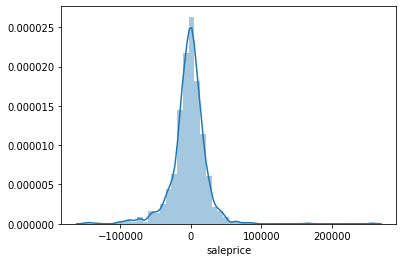

In [26]:
sns.distplot(y_train_pred - y_train)

Text(0, 0.5, 'Predicted Sale Price')

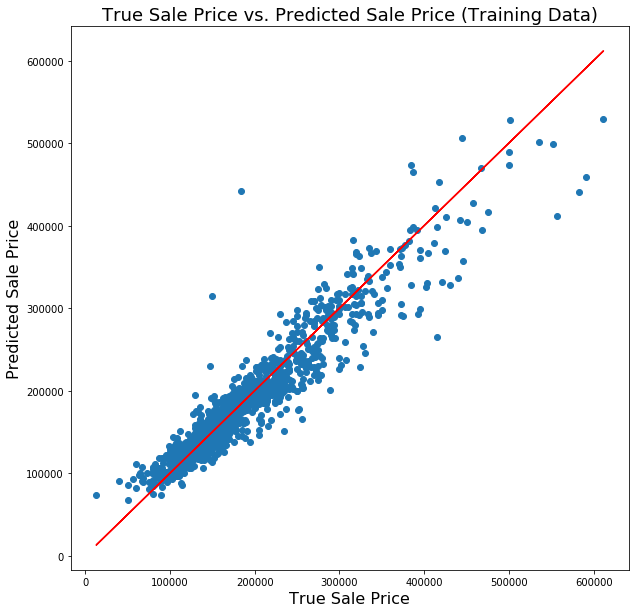

In [27]:
fig, ax = plt.subplots(figsize = (10,10))

plt.scatter(y_train, y_train_pred)

# Generate a line with unit slope and 0 intercept.
plt.plot(y_train, y_train, color = 'red');


# Label Axes
ax.set_title('True Sale Price vs. Predicted Sale Price (Training Data)', fontsize = 18)
ax.set_xlabel('True Sale Price', fontsize = 16)
ax.set_ylabel('Predicted Sale Price', fontsize = 16)


In [28]:
pred_test_knn = knn.predict(X_test_t)

In [29]:
knn.score(X_test_t,y_test)

0.8389747762692137

Text(0.5, 0, 'Sale Price')

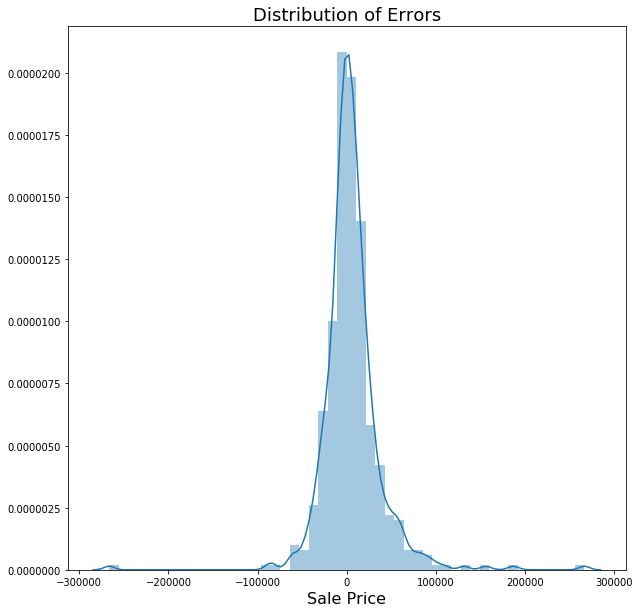

In [30]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.distplot(y_test - pred_test_knn, ax = ax)

ax.set_title('Distribution of Errors', fontsize = 18)
ax.set_xlabel('Sale Price', fontsize = 16)

Text(0, 0.5, 'Predicted Sale Price')

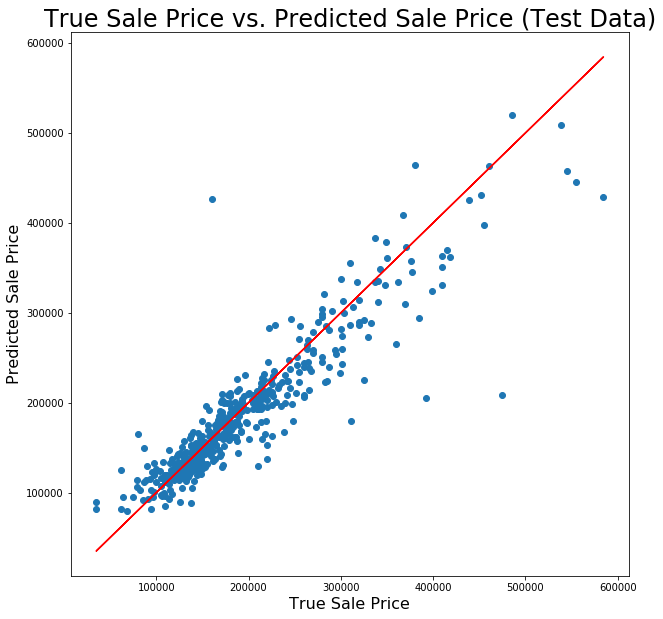

In [31]:
fig, ax = plt.subplots(figsize = (10,10))

plt.scatter(y_test, pred_test_knn)

# Generate a line with unit slope and 0 intercept.
plt.plot(y_test, y_test, color = 'red');


# Label Axes
ax.set_title('True Sale Price vs. Predicted Sale Price (Test Data)', fontsize = 24)
ax.set_xlabel('True Sale Price', fontsize = 16)
ax.set_ylabel('Predicted Sale Price', fontsize = 16)


In [32]:
knn.score(X_test_t, y_test)

0.8389747762692137

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [34]:
lr.fit(X_train_t, y_train)
train_pred_lr = lr.predict(X_train_t)

In [35]:
X_train.columns

Index(['garage_yr_blt', 'mas_vnr_area', 'year_built', 'year_remod/add',
       'gr_liv_area', '1st_flr_sf', 'total_bsmt_sf', 'totrms_abvgrd',
       'garage_cars', 'garage_area', 'overall_qual', 'full_bath',
       'mas_vnr_type', 'garage_finish', 'heating_qc', 'lot_shape',
       'fireplace_qu', 'season_sold', 'house_style', 'exter_qual',
       'foundation', 'bsmt_qual', 'kitchen_qual', 'neighborhood',
       'garage_type', 'bsmtfin_type_1'],
      dtype='object')

In [36]:
lr.score(X_train_t,y_train)

0.8700965384786041

Text(0, 0.5, 'Predicted Sale Price')

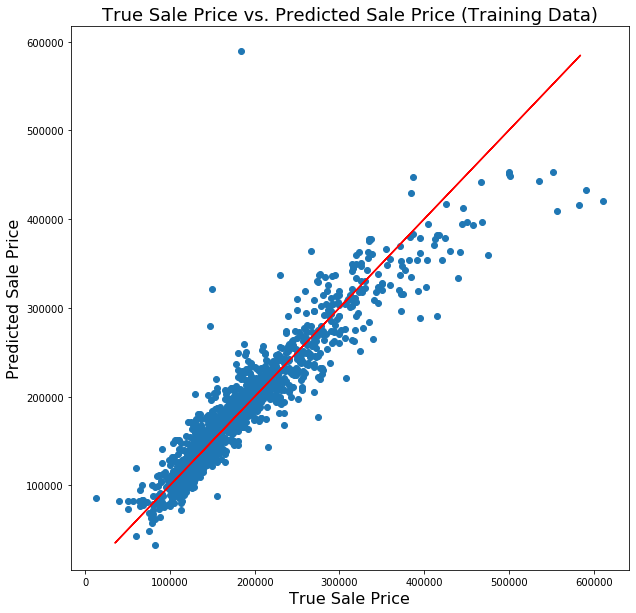

In [37]:
fig, ax = plt.subplots(figsize = (10,10))

plt.scatter(y_train, train_pred_lr)

# Generate a line with unit slope and 0 intercept.
plt.plot(y_test, y_test, color = 'red');


# Label Axes
ax.set_title('True Sale Price vs. Predicted Sale Price (Training Data)', fontsize = 18)
ax.set_xlabel('True Sale Price', fontsize = 16)
ax.set_ylabel('Predicted Sale Price', fontsize = 16)


Text(0.5, 0, 'Sale Price')

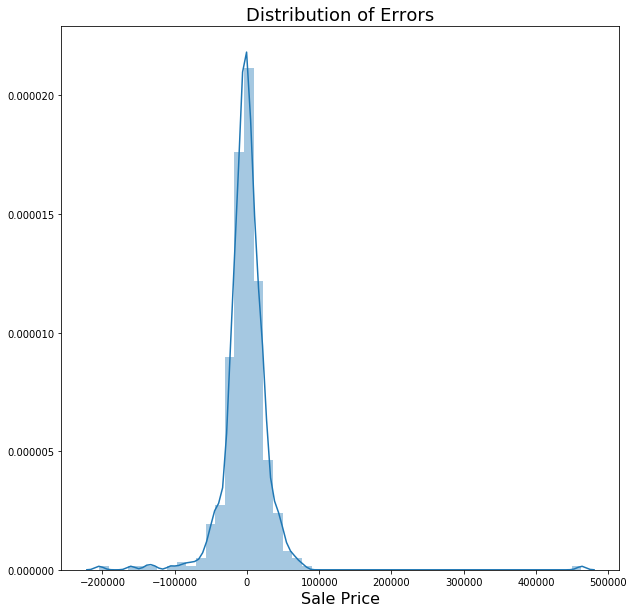

In [38]:
pred_test_lr = lr.predict(X_test_t)

fig, ax = plt.subplots(figsize = (10, 10))
sns.distplot(pred_test_lr - y_test)

ax.set_title('Distribution of Errors', fontsize = 18)
ax.set_xlabel('Sale Price', fontsize = 16)

In [39]:
lr.score(X_test_t, y_test)

0.8304992043225331

Text(0, 0.5, 'Predicted Sale Price')

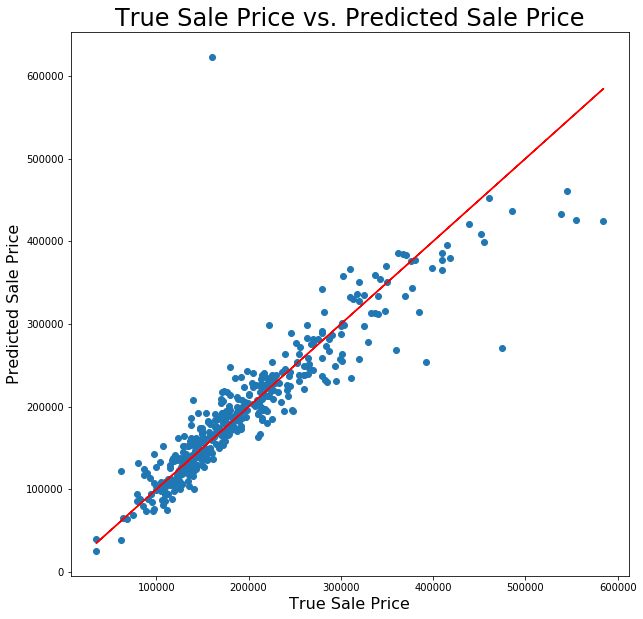

In [40]:
fig, ax = plt.subplots(figsize = (10,10))

plt.scatter(y_test, pred_test_lr)

# Generate a line with unit slope and 0 intercept.
plt.plot(y_test, y_test, color = 'red');


# Label Axes
ax.set_title('True Sale Price vs. Predicted Sale Price', fontsize = 24)
ax.set_xlabel('True Sale Price', fontsize = 16)
ax.set_ylabel('Predicted Sale Price', fontsize = 16)


## Ridge Regression

In [41]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [42]:
ridge.fit(X_train_t,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [43]:
ridge.score(X_train_t, y_train)

0.8662519833934564

In [44]:
ridge.score(X_test_t, y_test)

0.8275861193465592

In [45]:
ridge.coef_

array([ -3230.97755779,   4225.80973763,   3709.33580189,   5215.79202222,
        20253.22605899,    212.68901067,   8830.47504747,   -124.04664385,
          690.32596115,   8798.61212338,  13235.86935032,   -724.71803252,
        -6968.46064587,  -1708.44017691,   4306.48932951,   4370.41149327,
         2774.08976385,   -939.4082086 ,  -1834.68155524,   1699.77961658,
        -1762.37402048,   1743.28746748,   1283.35585663,  -2964.04892021,
          935.72749025,   7430.24017   ,  -6959.19144627,  -1406.77621398,
         9171.4573241 ,  -1746.46491543,   1989.29112679,  -7772.63487388,
        -2554.16760389,    912.5189423 ,  -1406.491164  ,  -1771.42257033,
          923.3815429 ,   2254.53219143,  -1211.98817651,   1676.71113582,
          524.7134767 ,  -9118.62215354,   2747.42184016,   -745.62925795,
         4101.30909372,   2026.08404159,  21406.11637579, -10611.95224082,
        -4291.09094764,  -6503.07318733,  -4146.50850564,   -608.48792304,
         3031.19914038,  

Text(0, 0.5, 'Predicted Sale Price')

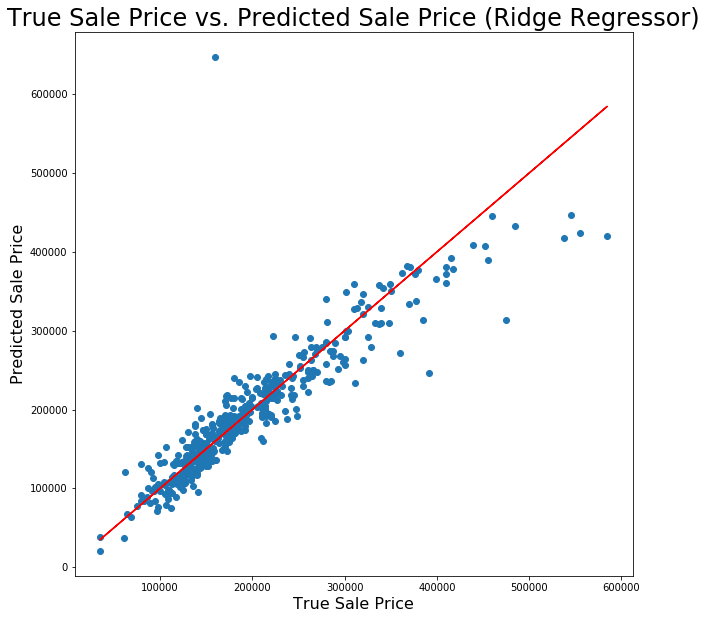

In [46]:
pred_test_ridge = ridge.predict(X_test_t)


fig, ax = plt.subplots(figsize = (10,10))

plt.scatter(y_test, pred_test_ridge)

# Generate a line with unit slope and 0 intercept.
plt.plot(y_test, y_test, color = 'red');


# Label Axes
ax.set_title('True Sale Price vs. Predicted Sale Price (Ridge Regressor)', fontsize = 24)
ax.set_xlabel('True Sale Price', fontsize = 16)
ax.set_ylabel('Predicted Sale Price', fontsize = 16)


## LASSO Regression

In [47]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(n_alphas = 100)

In [48]:
lasso.fit(X_train_t, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [49]:
lasso.score(X_train_t,y_train)

0.8666582877071131

In [50]:
y_train

id
1775    330000
1158    290000
1532    149000
1881    139900
1553    165500
         ...  
1076    234250
529     291000
1404    177000
479     184100
385     263435
Name: saleprice, Length: 1402, dtype: int64

In [51]:
lasso.score(X_test_t,y_test)

0.8273089186097808

In [52]:
lasso.coef_

array([ -2886.88828306,   3822.39763817,   3598.80890342,   5378.94707407,
        19776.56326523,    197.945375  ,   8902.81173178,     -0.        ,
          419.30003131,   8947.9170037 ,  12865.89810041,   -575.10603404,
        -6083.59421321,  -2151.78565901,   2958.27166718,   2881.66992158,
         3403.18413564,      0.        ,   -547.01710363,    248.0574336 ,
         -998.07405641,      0.        ,      0.        ,  -4152.88222472,
         1344.96818253,   7655.96416203,  -1015.4934947 ,   -470.98521334,
         7092.2146776 ,     -0.        ,   1311.91422765,  -8100.61349203,
           -0.        ,      0.        ,  -2233.88499355,  -2164.55448847,
           50.3946308 ,   1143.04627143,   -704.33590609,      0.        ,
            0.        ,  -6857.00368374,      0.        ,   -467.85927064,
         1087.93003933,    495.31233096,  30318.22114766,  -6046.74062127,
         1843.9380303 ,   -143.71078734,  -3057.29520268,     -0.        ,
         3057.9915968 ,  

Text(0, 0.5, 'Predicted Sale Price')

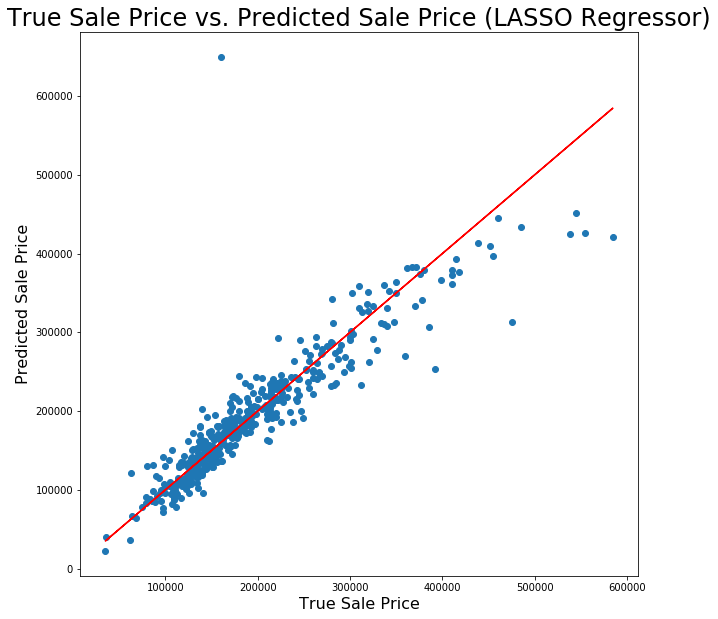

In [53]:
pred_test_lasso = lasso.predict(X_test_t)


fig, ax = plt.subplots(figsize = (10,10))

plt.scatter(y_test, pred_test_lasso)

# Generate a line with unit slope and 0 intercept.
plt.plot(y_test, y_test, color = 'red');


# Label Axes
ax.set_title('True Sale Price vs. Predicted Sale Price (LASSO Regressor)', fontsize = 24)
ax.set_xlabel('True Sale Price', fontsize = 16)
ax.set_ylabel('Predicted Sale Price', fontsize = 16)


In [54]:
print(f'k-Nearest Neighbors R2 score: {knn.score(X_test_t,y_test)}')
print(f'Ordineary Linear Regression R2 score: {lr.score(X_test_t,y_test)}')
print(f'LASSO Regression R2 score: {lasso.score(X_test_t,y_test)}')
print(f'Ridge Regression R2 score: {ridge.score(X_test_t,y_test)}')

k-Nearest Neighbors R2 score: 0.8389747762692137
Ordineary Linear Regression R2 score: 0.8304992043225331
LASSO Regression R2 score: 0.8273089186097808
Ridge Regression R2 score: 0.8275861193465592


Based on $R^2$-score, the best performing model is the kNN regressor at $84\%$

In [55]:
# Let's use some other metrics to evaluate our model
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'k-Nearest Neighbors Mean Abolute Error: {mean_absolute_error(y_test,pred_test_knn)}')
print(f'OLS Regression Mean Abolute Error: {mean_absolute_error(y_test,pred_test_lr)}')
print(f'Lasso Regression Mean Abolute Error: {mean_absolute_error(y_test,pred_test_lasso)}')
print(f'Ridge Mean Abolute Error: {mean_absolute_error(y_test,pred_test_ridge)}')

k-Nearest Neighbors Mean Abolute Error: 20432.65170940171
OLS Regression Mean Abolute Error: 18908.916666666668
Lasso Regression Mean Abolute Error: 18807.47879454832
Ridge Mean Abolute Error: 18809.113561829618


The model that minimizes mean absolute error is Lasso at about $18,807$

In [56]:
print(f'k-Nearest Neighbors Mean Squared Error: {mean_squared_error(y_test,pred_test_knn)}')
print(f'OLS Regression Mean Squared Error: {mean_squared_error(y_test,pred_test_lr)}')
print(f'Lasso Regression Mean Squared Error: {mean_squared_error(y_test,pred_test_lasso)}')
print(f'Ridge Mean Squared Error: {mean_squared_error(y_test,pred_test_ridge)}')

k-Nearest Neighbors Mean Squared Error: 1146395582.2491453
OLS Regression Mean Squared Error: 1206736179.8995726
Lasso Regression Mean Squared Error: 1229448953.4792342
Ridge Mean Squared Error: 1227475463.2851124


In [57]:
min([mean_squared_error(y_test,pred_test_knn),mean_squared_error(y_test,pred_test_lr),
 mean_squared_error(y_test,pred_test_lasso),mean_squared_error(y_test,pred_test_ridge)])

1146395582.2491453

The model minimizing mean squared error is the k-Nearest Neighbors regressor.

## Conclusions (Round 1)

k-nearest neighbors is the 'best' model that maximizes $R^2$ score and minimizes mean squared error. However, for a model that balances interperatibility and accuracy, LASSO would be best.

## Hyperparameter Tuning

Let's see if we get better results using gridsearch.

In [58]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import Pipeline
from sklearn.pipeline import Pipeline

### k-Nearest Neighbors

In [59]:
# Define dictionary of hyperparameters.
knn_params = {
    'n_neighbors': range(1, 51, 10),
    'weights':['uniform','distance'],
    'p':[1,2]
}

# Instantiate our GridSearchCV object.
knn_gridsearch = GridSearchCV(KNeighborsRegressor(), # What is the model we want to fit?
                             knn_params, # What is the dictionary of hyperparameters?
                              cv = 5, # What number of folds in CV will we use?
                              verbose=1)

# Fit the GridSearchCV object to the data.
knn_gridsearch.fit(X_train_t, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 51, 10), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [60]:
knn_gridsearch.best_score_


0.8478398722767256

In [61]:
# KNN Gridsearch 
knn_gridsearch.score(X_test_t, y_test)

0.8394052241193709

In [62]:
# Print out the set of hyperparameters that achieved the best score.
knn_gridsearch.best_params_

{'n_neighbors': 11, 'p': 2, 'weights': 'distance'}

In [63]:
# Store the best fit model as best_knn.
best_knn = knn_gridsearch.best_estimator_

# Evaluate the best fit model on the test data.
best_knn.score(X_test_t, y_test)

0.8394052241193709

### Lasso

In [64]:
# 
from sklearn.linear_model import LassoCV

# Define dictionary of hyperparameters.
lasso_cv = LassoCV()

# Fit the GridSearchCV object to the data.
lasso_cv.fit(X_train_t, y_train)
pred_train_lasso = lasso_cv.predict(X_train_t)

In [65]:
lasso_cv.score(X_train_t, y_train)

0.8666582877071131

In [66]:
lasso_cv.score(X_test_t, y_test)

0.8273089186097808

In [67]:
lasso_cv.coef_

array([ -2886.88828306,   3822.39763817,   3598.80890342,   5378.94707407,
        19776.56326523,    197.945375  ,   8902.81173178,     -0.        ,
          419.30003131,   8947.9170037 ,  12865.89810041,   -575.10603404,
        -6083.59421321,  -2151.78565901,   2958.27166718,   2881.66992158,
         3403.18413564,      0.        ,   -547.01710363,    248.0574336 ,
         -998.07405641,      0.        ,      0.        ,  -4152.88222472,
         1344.96818253,   7655.96416203,  -1015.4934947 ,   -470.98521334,
         7092.2146776 ,     -0.        ,   1311.91422765,  -8100.61349203,
           -0.        ,      0.        ,  -2233.88499355,  -2164.55448847,
           50.3946308 ,   1143.04627143,   -704.33590609,      0.        ,
            0.        ,  -6857.00368374,      0.        ,   -467.85927064,
         1087.93003933,    495.31233096,  30318.22114766,  -6046.74062127,
         1843.9380303 ,   -143.71078734,  -3057.29520268,     -0.        ,
         3057.9915968 ,  

## Kaggle Submission

### Model Winner

The winning model that we will use for our Kaggle submission is the k-Nearest Neighbors' Regressor.

In this final section, we will import `test.csv`

In [68]:
test_data_path = './datasets/ames_test_cleaned.csv'
ames_test = pd.read_csv(test_data_path, index_col = 'id')
ames_test.fillna('NA', axis = 1,inplace = True)
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   garage_yr_blt   878 non-null    float64
 1   mas_vnr_area    878 non-null    float64
 2   year_built      878 non-null    int64  
 3   exterior_1st    878 non-null    object 
 4   lot_shape       878 non-null    object 
 5   year_remod/add  878 non-null    int64  
 6   fireplace_qu    878 non-null    object 
 7   1st_flr_sf      878 non-null    int64  
 8   total_bsmt_sf   878 non-null    int64  
 9   house_style     878 non-null    object 
 10  exter_qual      878 non-null    object 
 11  neighborhood    878 non-null    object 
 12  overall_qual    878 non-null    int64  
 13  season_sold     878 non-null    object 
 14  bsmtfin_type_1  878 non-null    object 
 15  exterior_2nd    878 non-null    object 
 16  mas_vnr_type    878 non-null    object 
 17  garage_finish   878 non-null   

In [69]:
ames_test.head()

,garage_yr_blt,mas_vnr_area,year_built,exterior_1st,lot_shape,year_remod/add,fireplace_qu,1st_flr_sf,total_bsmt_sf,house_style,...,heating_qc,gr_liv_area,totrms_abvgrd,foundation,garage_cars,bsmt_qual,kitchen_qual,garage_area,garage_type,full_bath
id,,,,,,,,,,,,,,,,,,,,,
2658,1910.0,0.0,1910,AsbShng,Reg,1950,NA,908,1020,2Story,...,Gd,1928,9,Stone,1,Fa,Fa,440,Detchd,2
2718,1977.0,0.0,1977,Plywood,IR1,1977,NA,1967,1967,1Story,...,TA,1967,10,CBlock,2,Gd,TA,580,Attchd,2
2414,2006.0,0.0,2006,VinylSd,IR1,2006,Gd,664,654,2Story,...,Ex,1496,7,PConc,2,Gd,Gd,426,Attchd,2
1989,1935.0,0.0,1923,Wd Sdng,Reg,2006,NA,968,968,1Story,...,TA,968,5,CBlock,2,TA,TA,480,Detchd,1
625,1963.0,247.0,1963,Plywood,IR1,1963,Gd,1394,1394,1Story,...,Gd,1394,6,CBlock,2,Gd,TA,514,Attchd,1


In [70]:
# Use our column transformer from before and use the full training set to fit our model

ames_test_t = ct.fit_transform(ames_test)
X_t = ct.fit_transform(X)

In [71]:
# Identify the best parameters to use from before

knn_gridsearch.best_params_

{'n_neighbors': 11, 'p': 2, 'weights': 'distance'}

In [72]:
n_neighbors, p, weights = knn_gridsearch.best_params_.values()
print(f'n_neighbors: {n_neighbors}, p: {p}, weights: {weights}')

n_neighbors: 11, p: 2, weights: distance


In [73]:
knn_submission = KNeighborsRegressor(n_neighbors = n_neighbors, weights = weights, p = p)

In [74]:
knn_submission.fit(X_t, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance')

In [75]:
y_submit = knn_submission.predict(ames_test_t)

In [76]:
submission = pd.DataFrame(zip(ames_test.index,y_submit), columns = ['Id','SalePrice'])
submission

,Id,SalePrice
0,2658,129772.553490
1,2718,156760.995648
2,2414,211166.514974
3,1989,114359.549879
4,625,173248.368930
...,...,...
873,1662,175344.642963
874,1234,216448.044632
875,1373,142909.966601
876,1672,128566.301695


In [77]:
submission.to_csv('./datasets/dusing_submission.csv', index = False)